In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [40]:
df_US=df[df["job_country"]=="United States"].copy()

In [41]:
df_US['job_posted_month']=df_US['job_posted_date'].dt.strftime('%B')

In [42]:
df_US_pivot=df_US.pivot_table(index="job_posted_month",columns='job_title_short', aggfunc='size')

In [43]:
df_US_pivot.reset_index(inplace=True)


In [44]:
df_US_pivot['month_no']=pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [45]:
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns='month_no',inplace=True)

In [46]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,529,34,8541,2590,6940,62,1554,765,1553,120
February,444,21,6117,2999,5007,62,1258,856,1132,91
March,434,20,6215,3127,4729,57,1120,845,1136,111
April,570,39,6032,2805,4899,50,1022,777,987,114
May,287,21,5010,2958,4389,48,852,736,897,89
June,445,27,5683,2850,4672,43,1015,803,1050,97
July,587,45,5178,2537,4852,66,873,741,1104,150
August,896,37,6654,3263,6284,71,1183,877,1509,192
September,889,50,4651,3166,4627,116,793,776,1021,231


<Axes: xlabel='job_posted_month'>

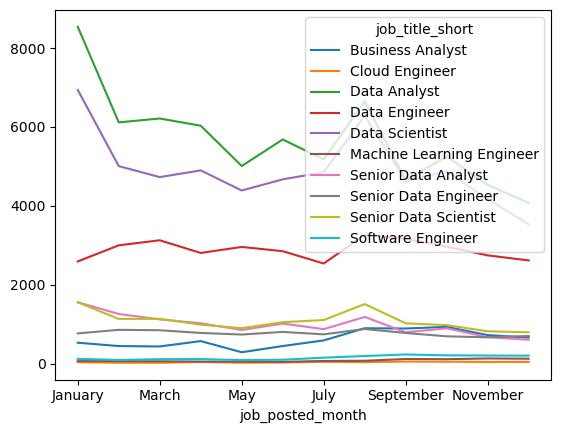

In [49]:
df_US_pivot.plot(kind='line')

In [56]:
top_3=df_US['job_title_short'].value_counts().head(3)
top_3=top_3.index.tolist()

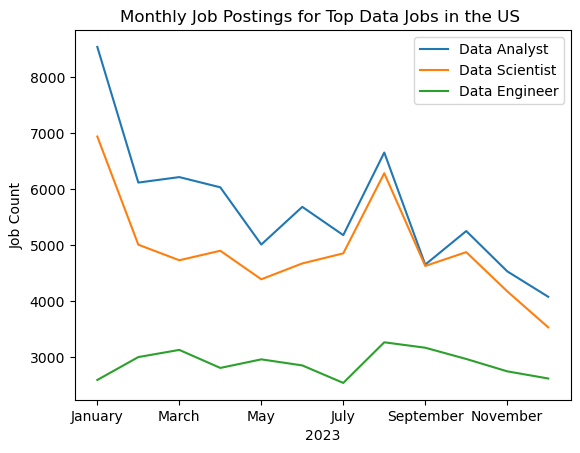

In [60]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US ')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()